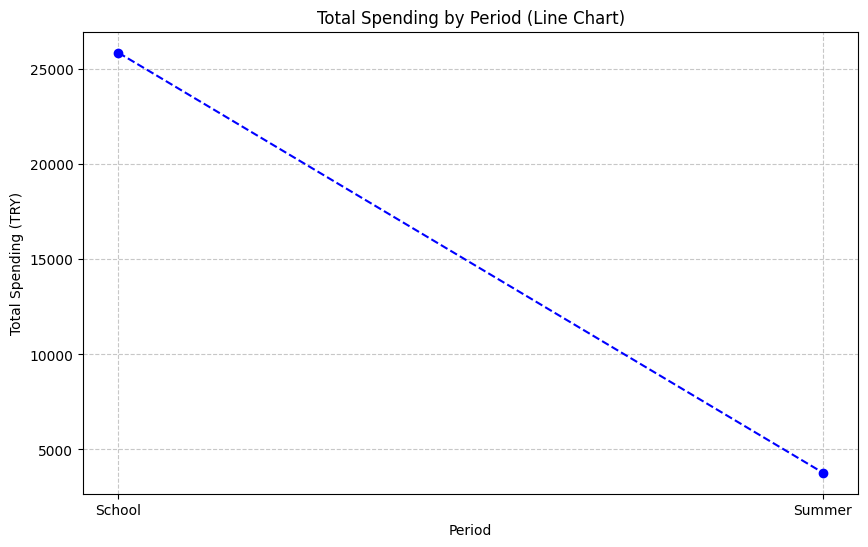

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükleme
data = pd.read_csv('/Users/emre/Desktop/dsa210_project/emre_yontucu_dsa210_project/Emre_YONTUCU_ticket.csv')

# Tarih sütununu datetime formatına çevirme
data['IslemZamanı'] = pd.to_datetime(data['IslemZamanı'], errors='coerce')

# Ay bilgisine göre dönem belirleme
data['month'] = data['IslemZamanı'].dt.month
data['period'] = data['month'].apply(lambda x: 'School' if 9 <= x or x <= 6 else 'Summer')

# Harcama sütununun sayısal olduğundan emin olun
data['IslemTutarı'] = data['IslemTutarı'].str.replace(',', '.').astype(float)

# Dönemlere göre toplam harcama
period_spending = data.groupby('period')['IslemTutarı'].sum()

# Grafiği görselleştirme
# Çizgi grafiği ile toplam harcama farkı
plt.figure(figsize=(10, 6))
period_spending.plot(kind='line', marker='o', linestyle='--', color='blue')
plt.title('Total Spending by Period (Line Chart)')
plt.xlabel('Period')
plt.ylabel('Total Spending (TRY)')
plt.xticks(ticks=[0, 1], labels=period_spending.index)
plt.grid(linestyle='--', alpha=0.7)
plt.show()
